# #1

Dòng thứ i của data, $ x^i_{1} $ là lương, $ x^i_{2} $ là thời gian làm việc của hồ sơ thứ i.\
$ p(x^i = 1) = \widehat{y}_{i} $ xác suất model predict hồ sơ i được duyệt\
$ p(x^i = 0) = 1 - \widehat{y}_{i} $ xác suất model predict hồ sơ i không được duyệt\
Model ở đây chọn hàm sigmoid: $ sig(x) = \displaystyle \frac{1}{1+e^{-x}}$\
Ở đây: $ sig'(x) = sig(x).[1-sig(x)] $\
Từ đó: $$ \widehat{y}_{i} = sig(z) = sig(w_{0}+w_{1}x^i_{1}+w_{2}x^i_{2}) = \frac{1}{1+e^{-(w_{0}+w_{1}x^i_{1}+w_{2}x^i_{2})}} $$\
Hàm loss được chọn là binary crossentropy: $ \displaystyle L = -\sum_{i=1}^{N}({y}_{i}log(\widehat{y}_{i}) + (1-y_{i})log(1-\widehat{y}_{i})) $\
Ta có: $\displaystyle \frac{dL}{dw} = \begin{bmatrix} \frac{dL}{dw_{0}}\\ \frac{dL}{dw_{1}}\\ \frac{dL}{dw_{2}} \end{bmatrix} $ \
Để sử dụng GD, xét gradient của L trên từng điểm dữ liệu:
$$\displaystyle \frac{dL}{dw_{0}} = \frac{dL}{d\widehat{y}_{i}}.\frac{d\widehat{y}_{i}}{dz}.\frac{dz}{dw_{0}} = \frac{\widehat{y}_{i}-y_{i}}{\widehat{y}_{i}(\widehat{y}_{i}-y_{i})} . \widehat{y}_{i}(\widehat{y}_{i}-y_{i}) . 1 = \widehat{y}_{i}-y_{i} $$\
Tương tự: $$ \frac{dL}{w_{1}} = x^{i}_{1}(\widehat{y}_{i}-y_{i}) $$ và $$ \frac{dL}{w_{2}} = x^{i}_{2}(\widehat{y}_{i}-y_{i}) $$\
Từ đó cộng lại được gradient của L theo w trên toàn bộ điểm dữ liệu. \
Biểu diễn theo ma trận: $ \displaystyle \frac{dL}{dw} = X^{T}(\widehat{Y}-Y) $
 


# #2

Từ chainrule ở trên: $\displaystyle \frac{dL}{dw_{i}} = \frac{\widehat{y}_{i}-y_{i}}{\widehat{y}_{i}(\widehat{y}_{i}-y_{i})} . \frac{d\widehat{y}_{i}}{dz} . \frac{dz}{dw_{i}} $ \
Vấn đề ở đây $ \displaystyle \frac{dz}{dw_{i}} $ đã biết, $\displaystyle \frac{d\widehat{y}_{i}}{dz} $ cần là một hàm để rút gọn với mẫu số $ \widehat{y}_{i}(\widehat{y}_{i}-y_{i}) $ \
Do đó cần tìm 1 hàm f: $\displaystyle \frac{df}{dx} = f.(1-f) $\
Hay: $\displaystyle \frac{df}{f(1-f)} = dx $\
Tích phân 2 vế: ta được: $ ln(f) - ln(1-f) = x $\
Suy ra: $ \displaystyle \frac{f}{1-f} = e^{x} $\
Tương đương: $\displaystyle f(x) = \frac{1}{1+e^{-x}} $ là hàm sigmoid

# #3

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

array([[8.  , 0.1 ],
       [7.  , 0.15],
       [4.  , 1.  ],
       [5.  , 0.8 ],
       [7.  , 0.3 ],
       [4.  , 1.  ],
       [5.  , 0.5 ],
       [6.  , 0.3 ],
       [7.  , 0.2 ],
       [8.  , 0.15]])

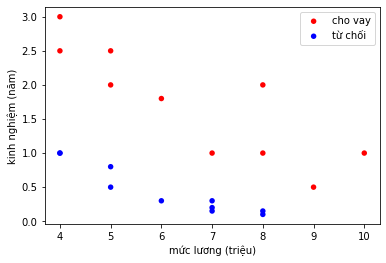

In [26]:
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, d-1].reshape(-1, 1)
# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

<ipython-input-51-a9fe30001ce9>:14: RuntimeWarning: divide by zero encountered in log
  cost[i][j] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
<ipython-input-51-a9fe30001ce9>:14: RuntimeWarning: invalid value encountered in multiply
  cost[i][j] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))


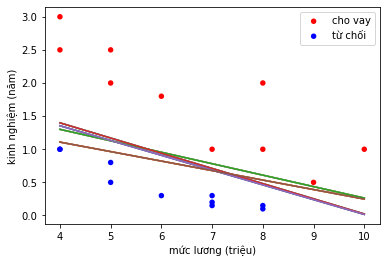

In [51]:
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
# Training
numOfIteration = 1000
learning_rate = [0.01,0.05,0.1,0.5]
cost = [[],[],[],[]]

for i in range(len(learning_rate)):
    cost[i] = np.zeros((numOfIteration,1))
    w = np.array([0.,0.1,0.1]).reshape(-1,1)
    for j in range(1, numOfIteration):
         # Tính giá trị dự đoán
        y_predict = sigmoid(np.dot(x, w))
        cost[i][j] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
        # Gradient descent
        # np.dot: nhan ma tran, * / multiply : element-wise
        w = w - learning_rate * np.dot(x.T, y_predict-y)
    t=0.5
    plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]))
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()

# #4

Chứng minh: giả sử tìm được hàm $$ f(x,y) = ax + by + c $$\
Với 4 điểm $ A(0,0) \space B(0,1) \space C(1,0)\space D(1,1) $, có: \
$ \begin{align}
 f(A).f(B) <= 0\\
 f(A).f(C) <= 0\\
 f(A).f(D) >= 0\\
\end{align} $ <=> $ \begin{align}
 c(b+c) <= 0\\
 c(a+c) <= 0\\
 c(a+b+c) >= 0\\
\end{align} $ <=> $ \begin{align}
 bc+ac+2c^{2} <= 0\\
 ac+bc+c^{2} >= 0\\
\end{align} $ (vô lý) 

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

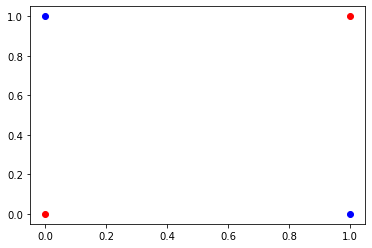

In [352]:
#parabol
x_1 = np.array([[0,0],[1,1]]).reshape(-1,2)
x_2 = np.array([[0,1],[1,0]]).reshape(-1,2)

plt.scatter(x_1[:, 0], x_1[:, 1], c='red')
plt.scatter(x_2[:, 0], x_2[:, 1], c='blue')
plt.show()

hàm cần tìm: axy+bx+cy+d = 0 => cần học 4 tham số a, b, c, d tương ứng w0, w1, w2, w3

In [525]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def update_x(x,d,w):
    for i in range(4):
        x[i][0] = d[i][0]*d[i][1]
        x[i][1] = d[i][0]
        x[i][2] = d[i][1]
        x[i][3] = 1
    return x

In [526]:
# d : data
d = np.vstack((x_1,x_2))
y = np.array([0,0,1,1]).reshape(-1,1)
w = np.array([1.,1.,1.,1.]).reshape(-1,1)

# x: ma tran trong gradient: x.T(y^-y) duoc cap nhat qua ham update_x
x = np.ones((4,4))

In [527]:
# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.05

for i in range(1, numOfIteration):
    
    # Tính giá trị dự đoán
    y_predict = []
    for j in range(4):
        y_predict = np.append(y_predict,[sigmoid(w[0]*d[j][0]*d[j][1]+w[1]*d[j][0]+w[2]*d[j][1]+w[3])])
    y_predict = y_predict.reshape(-1,1)
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    x = update_x(x,d,w)
    w = w - learning_rate * np.dot(x.T, y_predict-y)
    print(cost[i])

[5.58526764]
[5.35630498]
[5.13719988]
[4.92834549]
[4.73008343]
[4.54269372]
[4.36638507]
[4.20128586]
[4.04743621]
[3.90478181]
[3.77316999]
[3.65234884]
[3.54196974]
[3.44159388]
[3.35070265]
[3.26871145]
[3.19498616]
[3.1288611]
[3.06965718]
[3.01669898]
[2.96932973]
[2.92692357]
[2.88889465]
[2.85470326]
[2.82385903]
[2.79592183]
[2.7705008]
[2.74725196]
[2.72587494]
[2.70610921]
[2.68773002]
[2.67054442]
[2.65438738]
[2.63911818]
[2.62461714]
[2.61078267]
[2.59752865]
[2.58478211]
[2.5724813]
[2.56057395]
[2.54901577]
[2.53776925]
[2.52680254]
[2.51608861]
[2.50560442]
[2.49533033]
[2.48524953]
[2.4753476]
[2.46561212]
[2.45603235]
[2.44659898]
[2.43730386]
[2.42813987]
[2.41910073]
[2.41018088]
[2.40137533]
[2.39267965]
[2.38408982]
[2.37560218]
[2.36721341]
[2.35892044]
[2.35072045]
[2.34261082]
[2.33458909]
[2.32665296]
[2.31880028]
[2.31102898]
[2.30333713]
[2.29572287]
[2.28818444]
[2.28072014]
[2.27332834]
[2.26600749]
[2.25875606]
[2.25157261]
[2.24445573]
[2.23740405]
[2.

<function matplotlib.pyplot.show(close=None, block=None)>

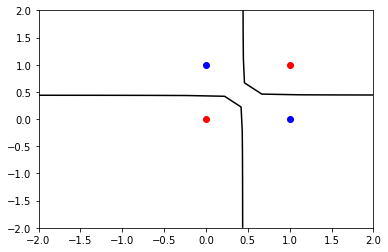

In [528]:
# Vẽ đường phân cách.
t = 0.5
plt.scatter(x_1[:, 0], x_1[:, 1], c='red')
plt.scatter(x_2[:, 0], x_2[:, 1], c='blue')

xline = np.linspace(-2., 2., 10)
yline = np.linspace(-2., 2., 10)
xline, yline = np.meshgrid(xline, yline)
plt.contour(xline, yline, w[0]*xline*yline+w[1]*xline+w[2]*yline+w[3]+np.log(1/t-1), [0], cmap='gray')
plt.show

# #5

In [595]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima = pima[1:]

In [596]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [597]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [598]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [615]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\hands\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [616]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [617]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

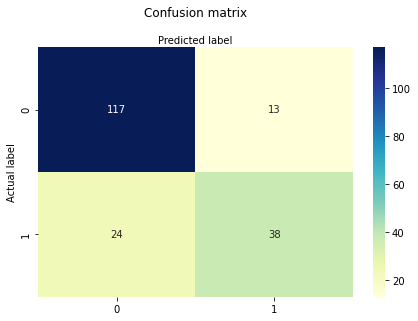

In [618]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# #6